In [1]:
#importing all the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBRegressor
from xgboost import plot_importance
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
#importing the csv file
#read_csv() # use to load or import csv file
dataset=pd.read_csv("C:\\Users\\Aditi Anand\\Desktop\H2HBABBA2694_data.csv")
#print(my_dataset)


In [2]:
#counting the row and col using shape
dataset.shape

(50000, 19)

In [3]:
#to count the number of distict values in each columns
coun_t  = dataset.nunique().to_frame(name = 'Counts')
coun_t

,Counts
business_code,6
cust_number,1094
name_customer,4227
clear_date,393
buisness_year,2
doc_id,48822
posting_date,502
document_create_date,505
document_create_date.1,503
due_in_date,546


In [4]:
#splitting the dataset into 2 section one for test which contains null clear dates values
# splitting them on the bases of isOpen column rows with value 1 means clear date is empty they are grouped into test set and rest are grouped in my dataset
my_dataset = dataset.groupby(dataset.isOpen )
my_dataset=my_dataset.get_group(0)
test_dataset = dataset.groupby(dataset.isOpen )
test_dataset=test_dataset.get_group(1)
my_dataset.shape ,test_dataset.shape

((40000, 19), (10000, 19))

In [5]:
my_dataset.nunique()

business_code                 6
cust_number                1054
name_customer              3926
clear_date                  393
buisness_year                 2
doc_id                    39140
posting_date                422
document_create_date        427
document_create_date.1      423
due_in_date                 490
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35694
baseline_create_date        430
cust_payment_terms           71
invoice_id                39131
isOpen                        1
dtype: int64

In [6]:
#dropping posting_id as it has same values in all the rows
my_dataset=my_dataset.drop(["posting_id"],axis=1)
my_dataset=my_dataset.drop(["isOpen"],axis=1)
my_dataset=my_dataset.drop(["document type"],axis=1)
test_dataset=test_dataset.drop(["posting_id"],axis=1)
test_dataset=test_dataset.drop(["isOpen"],axis=1)
test_dataset=test_dataset.drop(["document type"],axis=1)

In [7]:
my_dataset.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
dtype: int64

In [8]:
#dropping the area business values as all the values are NULL
my_dataset=my_dataset.drop(["area_business"],axis=1)
test_dataset=test_dataset.drop(["area_business"],axis=1)

In [9]:
my_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                9
dtype: int64

In [10]:
my_dataset[my_dataset.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
11791,CA02,140104409,LOB in,12/27/2019 0:00,2019,9500000200,4/30/2019,20190430,20190408,20190418,CAD,454.44,20190408,CA10,NaN
14451,CA02,140104409,LOB co,5/31/2019 0:00,2019,9500000049,3/29/2019,20190329,20181024,20181103,CAD,878.40,20181024,CA10,NaN
18817,CA02,140106054,TREE in,5/6/2019 0:00,2019,9500000129,3/29/2019,20190329,20190128,20190207,CAD,12636.00,20190128,CA10,NaN
34997,CA02,140104409,LOB associates,4/17/2019 0:00,2019,9500000077,3/29/2019,20190329,20190314,20190324,CAD,698.60,20190314,CA10,NaN
38018,CA02,100030194,AMAZO us,5/23/2019 0:00,2019,9500000007,3/29/2019,20190329,20190311,20190321,CAD,846.70,20190311,CA10,NaN
38732,CA02,140104409,LOB associates,5/31/2019 0:00,2019,9500000051,3/29/2019,20190329,20190131,20190210,CAD,20472.48,20190131,CA10,NaN
46134,CA02,140104409,LOB trust,5/31/2019 0:00,2019,9500000057,3/29/2019,20190329,20190307,20190317,CAD,17264.88,20190307,CA10,NaN
47478,CA02,140104409,LOB co,12/27/2019 0:00,2019,9500000073,3/29/2019,20190329,20190228,20190310,CAD,173.44,20190228,CA10,NaN
49612,CA02,140106054,TREE llc,5/6/2019 0:00,2019,9500000104,3/29/2019,20190329,20190208,20190218,CAD,938.43,20190208,CA10,NaN


In [11]:
my_dataset = my_dataset[my_dataset['invoice_id'].notna()]
my_dataset.shape

(39991, 15)

In [12]:
my_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
dtype: int64

In [13]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39991 entries, 1 to 49998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39991 non-null  object 
 1   cust_number             39991 non-null  object 
 2   name_customer           39991 non-null  object 
 3   clear_date              39991 non-null  object 
 4   buisness_year           39991 non-null  int64  
 5   doc_id                  39991 non-null  int64  
 6   posting_date            39991 non-null  object 
 7   document_create_date    39991 non-null  int64  
 8   document_create_date.1  39991 non-null  int64  
 9   due_in_date             39991 non-null  int64  
 10  invoice_currency        39991 non-null  object 
 11  total_open_amount       39991 non-null  float64
 12  baseline_create_date    39991 non-null  int64  
 13  cust_payment_terms      39991 non-null  object 
 14  invoice_id              39991 non-null

In [14]:
#checking if doc_id and invoice_id are same 
(my_dataset['doc_id'] == my_dataset['invoice_id']).sum()

39991

In [15]:
#doc_id and invoice id are exactly same so dropping doc_id
my_dataset=my_dataset.drop(["doc_id"],axis=1)
test_dataset=test_dataset.drop(["doc_id"],axis=1)

In [16]:
#deleting column having unique rows as this cannont help are to find any pattern in prediciton as every row id different.
my_dataset=my_dataset.drop(["invoice_id"],axis=1)
test_dataset=test_dataset.drop(["invoice_id"],axis=1)

In [17]:
#deleting the insignificant columns
my_dataset=my_dataset.drop(["name_customer"],axis=1)
my_dataset=my_dataset.drop(["document_create_date"],axis=1)
test_dataset=test_dataset.drop(["name_customer"],axis=1)
test_dataset=test_dataset.drop(["document_create_date"],axis=1)

In [18]:
my_dataset.shape


(39991, 11)

In [19]:
my_dataset.head()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,200769623,6/12/2019 0:00,2019,6/1/2019,20190601,20190616,USD,3689.22,20190601,NAH4
2,U001,200900909,6/26/2019 0:00,2019,6/12/2019,20190612,20190627,USD,8351.59,20190612,NAA8
3,U001,200769623,6/25/2019 0:00,2019,6/14/2019,20190614,20190629,USD,8496.77,20190614,NAH4
4,U001,200769623,4/16/2019 0:00,2019,4/6/2019,20190406,20190421,USD,13175.19,20190406,NAH4
5,U001,200769623,10/15/2019 0:00,2019,9/30/2019,20190930,20191015,USD,454.06,20190930,NAH4


In [20]:
# printint the datatype of the columns
print(my_dataset.dtypes)

business_code              object
cust_number                object
clear_date                 object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
dtype: object


In [21]:
# changing the datatype to datetime
my_dataset['clear_date']=pd.to_datetime(my_dataset['clear_date'].astype(str))
my_dataset['due_in_date']=pd.to_datetime(my_dataset['due_in_date'].astype(str))
my_dataset['baseline_create_date']=pd.to_datetime(my_dataset['baseline_create_date'].astype(str))
my_dataset['document_create_date.1']=pd.to_datetime(my_dataset['document_create_date.1'].astype(str))
my_dataset['posting_date']=pd.to_datetime(my_dataset['posting_date'].astype(str))
test_dataset['due_in_date']=pd.to_datetime(test_dataset['due_in_date'].astype(str))
test_dataset['baseline_create_date']=pd.to_datetime(test_dataset['baseline_create_date'].astype(str))
test_dataset['document_create_date.1']=pd.to_datetime(test_dataset['document_create_date.1'].astype(str))
test_dataset['posting_date']=pd.to_datetime(test_dataset['posting_date'].astype(str))
test_dataset['clear_date']=pd.to_datetime(test_dataset['clear_date'].astype(str))
my_dataset.dtypes


business_code                     object
cust_number                       object
clear_date                datetime64[ns]
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [22]:
#sorting the posting date to split the data based on posting date
my_dataset.sort_values('posting_date')

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
45369,U001,200769623,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,USD,17304.48,2018-12-30,NAH4
34132,U001,200769623,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,USD,42635.76,2018-12-30,NAH4
22837,U001,200750051,2019-01-14,2019,2018-12-30,2018-12-30,2019-01-14,USD,54013.77,2018-12-30,NAA8
31297,U001,200555117,2019-01-14,2019,2018-12-30,2018-12-30,2019-01-14,USD,74110.38,2018-12-30,NAA8
22787,U001,200707822,2019-01-14,2019,2018-12-30,2018-12-30,2019-01-14,USD,55772.14,2018-12-30,NAA8
...,...,...,...,...,...,...,...,...,...,...,...
16911,U001,200769623,2020-03-09,2020,2020-02-26,2020-02-26,2020-03-12,USD,53075.34,2020-02-26,NAH4
7407,U001,200759878,2020-03-13,2020,2020-02-27,2020-02-27,2020-03-13,USD,65988.21,2020-02-27,NAH4
27368,U001,200759878,2020-03-13,2020,2020-02-27,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4
40933,U001,100031704,2020-03-17,2020,2020-02-27,2020-02-27,2020-03-13,USD,101667.64,2020-02-27,NAA8


In [23]:
#dropping the rows where document for invoice is created before baseline carete date
temp = pd.Series(my_dataset['document_create_date.1'] - my_dataset['baseline_create_date']).dt.days
my_dataset = my_dataset[((temp==0) | (temp>0))].reset_index(drop=True)
my_dataset.shape

(37348, 11)

In [24]:
#dropping the document created columns as they are of no use now
my_dataset =my_dataset.drop(columns = ['document_create_date.1'])
test_dataset =test_dataset.drop(columns = ['document_create_date.1'])

In [25]:
my_dataset['payment_term']=pd.Series(my_dataset['clear_date'] - my_dataset['baseline_create_date']).dt.days
my_dataset['due_term']=pd.Series(my_dataset['due_in_date'] - my_dataset['baseline_create_date']).dt.days

test_dataset['due_term']=pd.Series(test_dataset['due_in_date'] - test_dataset['baseline_create_date']).dt.days

In [26]:
my_dataset['delay']=(my_dataset['clear_date']-my_dataset['due_in_date']).dt.days

In [27]:
#changing the CAD amount to USD amount 
my_dataset.loc[my_dataset.invoice_currency == 'CAD', 'total_open_amount'] = 0.81*my_dataset['total_open_amount']
test_dataset.loc[test_dataset.invoice_currency == 'CAD', 'total_open_amount'] = 0.81*test_dataset['total_open_amount']

In [28]:
#dropping invoice currency column as we dont need it anymore
my_dataset = my_dataset.drop(columns=['invoice_currency'])
test_dataset = test_dataset.drop(columns=['invoice_currency'])

<AxesSubplot:xlabel='total_open_amount'>

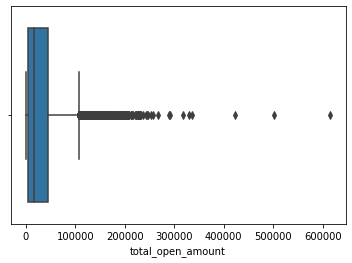

In [29]:
sns.boxplot(x=my_dataset['total_open_amount'])

In [30]:
Q1 = my_dataset['total_open_amount'].quantile(0.25)

Q3 = my_dataset['total_open_amount'].quantile(0.75)

IQR = Q3-Q1

lower_range =( Q1 -(2 * IQR)) # with 1.5 observed almost ~1500 outliers which is almost 4.8% of data,so changed to 3 where i got 221 outliers  and treated it

upper_range = Q3 + (2* IQR)

print("Q1: ",Q1)

print("Q3: ",Q3)

print("IQR: ",IQR)

print("lower_range",lower_range)

print('upper_range',upper_range)

print("no. of outliers ---->",len(my_dataset[(my_dataset.total_open_amount < lower_range) | (my_dataset.total_open_amount > upper_range)]))#total no.of outliers

Q1:  4330.335
Q3:  45396.25
IQR:  41065.915
lower_range -77801.495
upper_range 127528.08
no. of outliers ----> 937


In [31]:
my_dataset.drop(my_dataset[ (my_dataset.total_open_amount  > upper_range) | (my_dataset.total_open_amount  < lower_range) ].index , inplace=True)

In [32]:
X=my_dataset.drop(['delay'],axis=1)
Y=my_dataset['delay']

In [33]:
X_train,X_val,y_train,y_val= train_test_split(X,Y,test_size=0.3,random_state=0,shuffle=True)

In [34]:
X_train.shape , X_val.shape

((25487, 11), (10924, 11))

<AxesSubplot:xlabel='delay', ylabel='Density'>

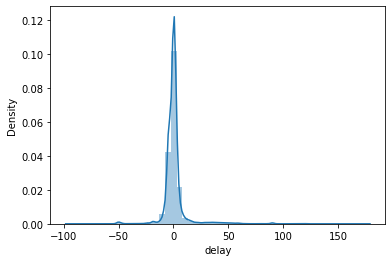

In [35]:
sns.distplot(y_train)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25487 entries, 15293 to 2797
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         25487 non-null  object        
 1   cust_number           25487 non-null  object        
 2   clear_date            25487 non-null  datetime64[ns]
 3   buisness_year         25487 non-null  int64         
 4   posting_date          25487 non-null  datetime64[ns]
 5   due_in_date           25487 non-null  datetime64[ns]
 6   total_open_amount     25487 non-null  float64       
 7   baseline_create_date  25487 non-null  datetime64[ns]
 8   cust_payment_terms    25487 non-null  object        
 9   payment_term          25487 non-null  int64         
 10  due_term              25487 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
memory usage: 2.3+ MB


<AxesSubplot:xlabel='clear_date', ylabel='baseline_create_date'>

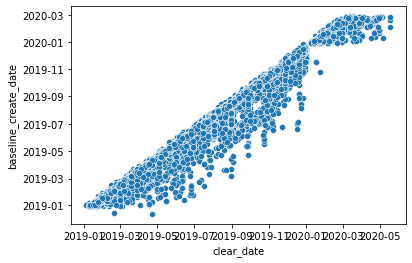

In [37]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='clear_date' , y='baseline_create_date')

<AxesSubplot:xlabel='clear_date', ylabel='total_open_amount'>

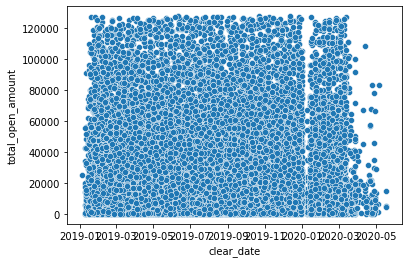

In [38]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='clear_date' , y='total_open_amount')

<AxesSubplot:xlabel='payment_term', ylabel='total_open_amount'>

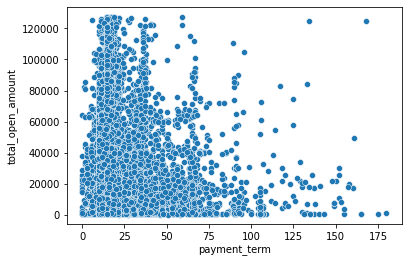

In [39]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='payment_term' , y='total_open_amount')

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

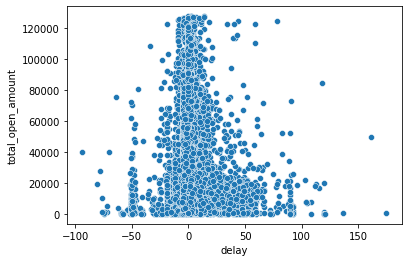

In [40]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='delay' , y='total_open_amount')

In [41]:

X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_train['clear_date_day'] = X_train['clear_date'].dt.day
X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_train['clear_date_month'] = X_train['clear_date'].dt.month
X_train['baseline_create_date_year'] = X_train['baseline_create_date'].dt.year
X_train['due_in_date_year'] = X_train['due_in_date'].dt.year
X_train['clear_date_year'] = X_train['clear_date'].dt.year
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_year'] = X_train['posting_date'].dt.year

X_val['clear_date_day'] =X_val['clear_date'].dt.day
X_val['baseline_create_date_day'] =X_val['baseline_create_date'].dt.day
X_val['due_in_date_day'] = X_val['due_in_date'].dt.day
X_val['clear_date_month'] = X_val['clear_date'].dt.month
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_date_year'] = X_val['baseline_create_date'].dt.year
X_val['due_in_date_year'] = X_val['due_in_date'].dt.year
X_val['clear_date_year'] = X_val['clear_date'].dt.year
X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_year'] = X_val['posting_date'].dt.year


test_dataset['baseline_create_date_day'] = test_dataset['baseline_create_date'].dt.day
test_dataset['due_in_date_day'] =test_dataset['due_in_date'].dt.day
test_dataset['baseline_create_date_month'] = test_dataset['baseline_create_date'].dt.month
test_dataset['due_in_date_month'] = test_dataset['due_in_date'].dt.month
test_dataset['baseline_create_date_year'] = test_dataset['baseline_create_date'].dt.year
test_dataset['due_in_date_year'] = test_dataset['due_in_date'].dt.year
test_dataset['posting_date_day'] =test_dataset['posting_date'].dt.day
test_dataset['posting_date_month'] = test_dataset['posting_date'].dt.month
test_dataset['posting_date_year'] = test_dataset['posting_date'].dt.year

In [42]:
X_train.shape

(25487, 23)

In [43]:
X_val =X_val.drop(columns = ['due_in_date'])
X_val =X_val.drop(columns = ['baseline_create_date'])
X_train =X_train.drop(columns = ['clear_date'])
X_val =X_val.drop(columns = ['clear_date'])
X_train =X_train.drop(columns = ['due_in_date'])
X_train =X_train.drop(columns = ['baseline_create_date'])
X_val =X_val.drop(columns = ['posting_date'])
X_train =X_train.drop(columns = ['posting_date'])
test_dataset =test_dataset.drop(columns = ['baseline_create_date'])
test_dataset =test_dataset.drop(columns = ['due_in_date'])
test_dataset =test_dataset.drop(columns = ['posting_date'])

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25487 entries, 15293 to 2797
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               25487 non-null  object 
 1   cust_number                 25487 non-null  object 
 2   buisness_year               25487 non-null  int64  
 3   total_open_amount           25487 non-null  float64
 4   cust_payment_terms          25487 non-null  object 
 5   payment_term                25487 non-null  int64  
 6   due_term                    25487 non-null  int64  
 7   baseline_create_date_day    25487 non-null  int64  
 8   due_in_date_day             25487 non-null  int64  
 9   clear_date_day              25487 non-null  int64  
 10  baseline_create_date_month  25487 non-null  int64  
 11  due_in_date_month           25487 non-null  int64  
 12  clear_date_month            25487 non-null  int64  
 13  baseline_create_date_year   

In [45]:
my_dataset.business_code.value_counts()

U001    35216
CA02      545
U013      518
U002      117
U005       11
U007        4
Name: business_code, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
business_code_enc=LabelEncoder()
business_code_enc.fit(X_train['business_code'])
X_train['business_code_enc']=business_code_enc.transform(X_train['business_code'])

In [48]:
X_val['business_code_enc']=business_code_enc.transform(X_val['business_code'])

In [49]:
X_val =X_val.drop(columns = ['business_code'])
X_train =X_train.drop(columns = ['business_code'])

In [50]:
X_train.cust_number.value_counts()

200769623    6759
200726979    1145
200762301     793
200759878     758
200794332     708
             ... 
200539926       1
100015934       1
200375184       1
200756811       1
100054299       1
Name: cust_number, Length: 847, dtype: int64

In [51]:
# to extract the number from cust_number rows which are in string format eg CCCA01...
X_train['cust_number'] = X_train['cust_number'].str.extract('(\d+)')
X_val['cust_number'] = X_val['cust_number'].str.extract('(\d+)')

In [52]:
#type cast the cust_number calumn to int
X_train['cust_number'] =X_train['cust_number'].astype(int)
X_val['cust_number'] =X_val['cust_number'].astype(int)

In [53]:
cust_payment_terms_enc=LabelEncoder()
cust_payment_terms_enc.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=cust_payment_terms_enc.transform(X_train['cust_payment_terms'])


In [54]:
cust_payment_terms_enc.fit(X_val['cust_payment_terms'])
X_val['cust_payment_terms_enc']=cust_payment_terms_enc.transform(X_val['cust_payment_terms'])

In [55]:
X_val =X_val.drop(columns = ['cust_payment_terms'])
X_train =X_train.drop(columns = ['cust_payment_terms'])

In [56]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10924 entries, 6417 to 4878
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_number                 10924 non-null  int32  
 1   buisness_year               10924 non-null  int64  
 2   total_open_amount           10924 non-null  float64
 3   payment_term                10924 non-null  int64  
 4   due_term                    10924 non-null  int64  
 5   clear_date_day              10924 non-null  int64  
 6   baseline_create_date_day    10924 non-null  int64  
 7   due_in_date_day             10924 non-null  int64  
 8   clear_date_month            10924 non-null  int64  
 9   due_in_date_month           10924 non-null  int64  
 10  baseline_create_date_month  10924 non-null  int64  
 11  baseline_create_date_year   10924 non-null  int64  
 12  due_in_date_year            10924 non-null  int64  
 13  clear_date_year             1

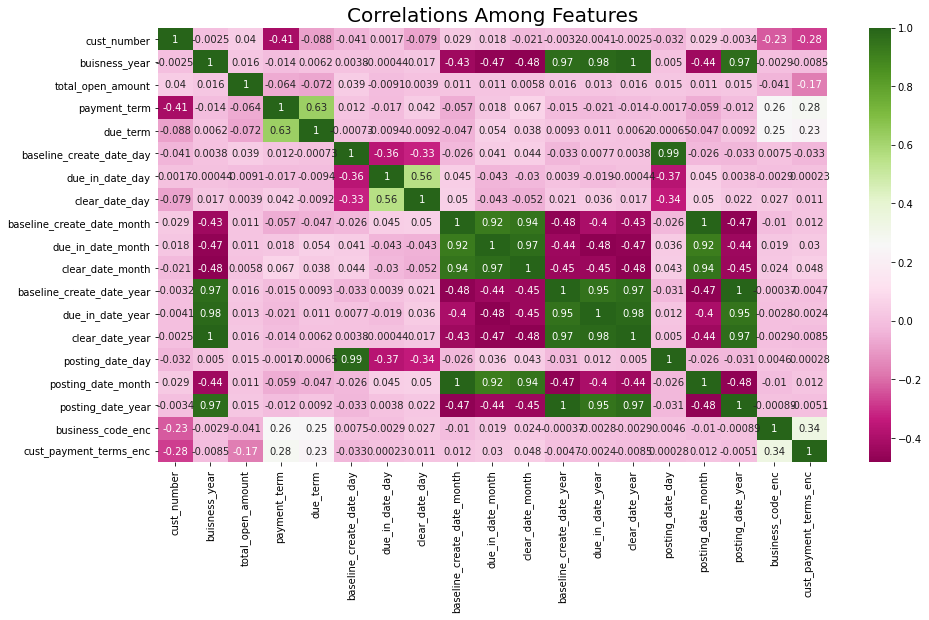

In [57]:
plt.subplots(figsize =(15,8))
sns.heatmap(X_train.corr(),annot=True,cmap="PiYG")
plt.title("Correlations Among Features",fontsize = 20);

In [58]:
from sklearn.linear_model import LinearRegression
base_model= LinearRegression()
base_model.fit(X_train,y_train)



LinearRegression()

In [73]:
y_predict=base_model.predict(X_val)

In [74]:
y_val

6417     -3
24585   -20
25301     3
12346     0
30577     3
         ..
33723   -17
11261     0
5053      1
18241    -5
4878      4
Name: delay, Length: 10924, dtype: int64

In [75]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_val, y_predict, squared=False)

1.584457077499529e-12

In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [81]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [82]:
y_predict2 = regressor.predict(X_val)

In [83]:
mean_squared_error(y_val, y_predict2, squared=False)

5.321906680437145